Imports

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('../../data/feature_store/data_with_new_features.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        4894 non-null   int64  
 1   age                       4894 non-null   int64  
 2   experience                4894 non-null   int64  
 3   income                    4894 non-null   int64  
 4   zip_code                  4894 non-null   int64  
 5   family                    4894 non-null   int64  
 6   cc_avg                    4894 non-null   float64
 7   education                 4894 non-null   int64  
 8   mortgage                  4894 non-null   int64  
 9   personal_loan             4894 non-null   int64  
 10  securities_account        4894 non-null   int64  
 11  cd_account                4894 non-null   int64  
 12  online                    4894 non-null   int64  
 13  credit_card               4894 non-null   int64  
 14  age_brac

In [8]:
# columns

features = df.columns.tolist()

In [9]:
#  Renda per capita por membro da familia (média)
'''
pode ajudar a entender a capacidade de pagamento
de despesas per capita.
'''

df['income_per_family_member'] = df['income'] / (df['family'] + 1)

# Despesas com cartão de crédito em relação a renda

'''
captura o quanto o individuo gasta com cartão de crédito em relação
ao total de sua renda. Pode ser uma indicação de risco caso essa 
taxa seja alta.
'''

df['cc_to_income_ratio'] = df['cc_avg'] / df['income']

# Indice de comprometimento de renda com dividas

'''
fornece uma ideia da relação entre a dívida e a renda total
para medir a capacidade de tomar um novo crédito.
'''

df['debt_to_income_ratio'] = (df['cc_avg'] + df['mortgage']) / df['income']


# Nível de maturidade financeira

'''

'''

df['financial_maturity_index'] = (df['income'] / df['cc_avg'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        4894 non-null   int64  
 1   age                       4894 non-null   int64  
 2   experience                4894 non-null   int64  
 3   income                    4894 non-null   int64  
 4   zip_code                  4894 non-null   int64  
 5   family                    4894 non-null   int64  
 6   cc_avg                    4894 non-null   float64
 7   education                 4894 non-null   int64  
 8   mortgage                  4894 non-null   int64  
 9   personal_loan             4894 non-null   int64  
 10  securities_account        4894 non-null   int64  
 11  cd_account                4894 non-null   int64  
 12  online                    4894 non-null   int64  
 13  credit_card               4894 non-null   int64  
 14  age_brac

<Axes: ylabel='Frequency'>

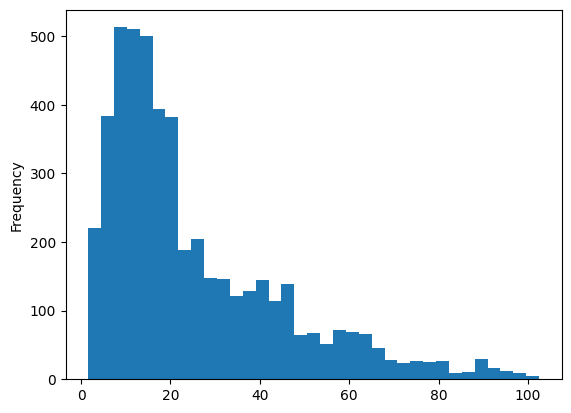

In [11]:
df['income_per_family_member'].plot(kind='hist', bins=35)

<Axes: ylabel='Frequency'>

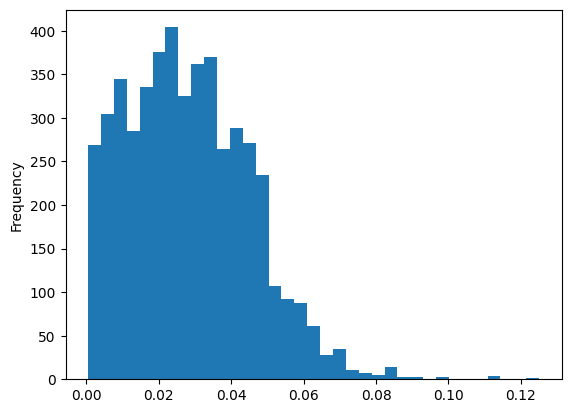

In [12]:
df['cc_to_income_ratio'].plot(kind='hist', bins=35)

In [13]:
# Identificando valores tendendo ao infinito...

infinite_values = df[df['financial_maturity_index'].isin([np.inf, -np.inf])]

In [14]:
# Tratando valores que podem estar tendendo ao infinito

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [15]:
df['financial_maturity_index']

0        30.625000
1        22.666667
2        11.000000
3        37.037037
4        45.000000
           ...    
4889     21.052632
4890     37.500000
4891     80.000000
4892     98.000000
4893    103.750000
Name: financial_maturity_index, Length: 4894, dtype: float64

<Axes: ylabel='Frequency'>

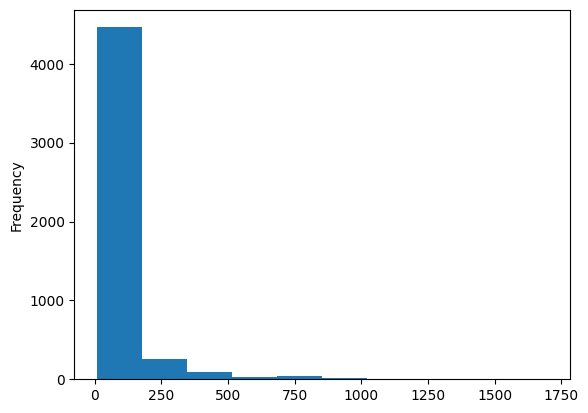

In [16]:
df['financial_maturity_index'].plot(kind='hist')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        4894 non-null   int64  
 1   age                       4894 non-null   int64  
 2   experience                4894 non-null   int64  
 3   income                    4894 non-null   int64  
 4   zip_code                  4894 non-null   int64  
 5   family                    4894 non-null   int64  
 6   cc_avg                    4894 non-null   float64
 7   education                 4894 non-null   int64  
 8   mortgage                  4894 non-null   int64  
 9   personal_loan             4894 non-null   int64  
 10  securities_account        4894 non-null   int64  
 11  cd_account                4894 non-null   int64  
 12  online                    4894 non-null   int64  
 13  credit_card               4894 non-null   int64  
 14  age_brac

In [18]:
df['education'].value_counts()

education
1    2035
3    1475
2    1384
Name: count, dtype: int64

In [26]:
def renaming(degree: int) -> str:
    if degree == 1:
        return 'high school'
    elif degree == 2:
        return 'college'
    else:
        return 'postgraduate'


df['education_degree'] = df['education'].apply(renaming)

In [28]:
df['education_degree'].value_counts(normalize=True)

education_degree
high school     0.415815
postgraduate    0.301389
college         0.282795
Name: proportion, dtype: float64

In [29]:
df[['education', 'education_degree']]

,education,education_degree
0,1,high school
1,1,high school
2,1,high school
3,2,college
4,2,college
...,...,...
4889,3,postgraduate
4890,1,high school
4891,3,postgraduate
4892,2,college
